# Sensitivity Analysis

Compare the Model Sensitivity to HWP Half-life (1-200 years) and Displacement Factor (0 to 2.4 tc/tc) when Minimizing Net Forest System Carbon Emission with Even-flow Constraints (5,000 Combinations in Total)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
base_folder_both = 'results/minimize_emission_loop/half_life/even_flow' #Choose the file folder where you save results of each scenario

In [4]:
iteration_both = 200

Create a 3D Map for the Model Sensitivity to HWP Half-life and Displacement Factor

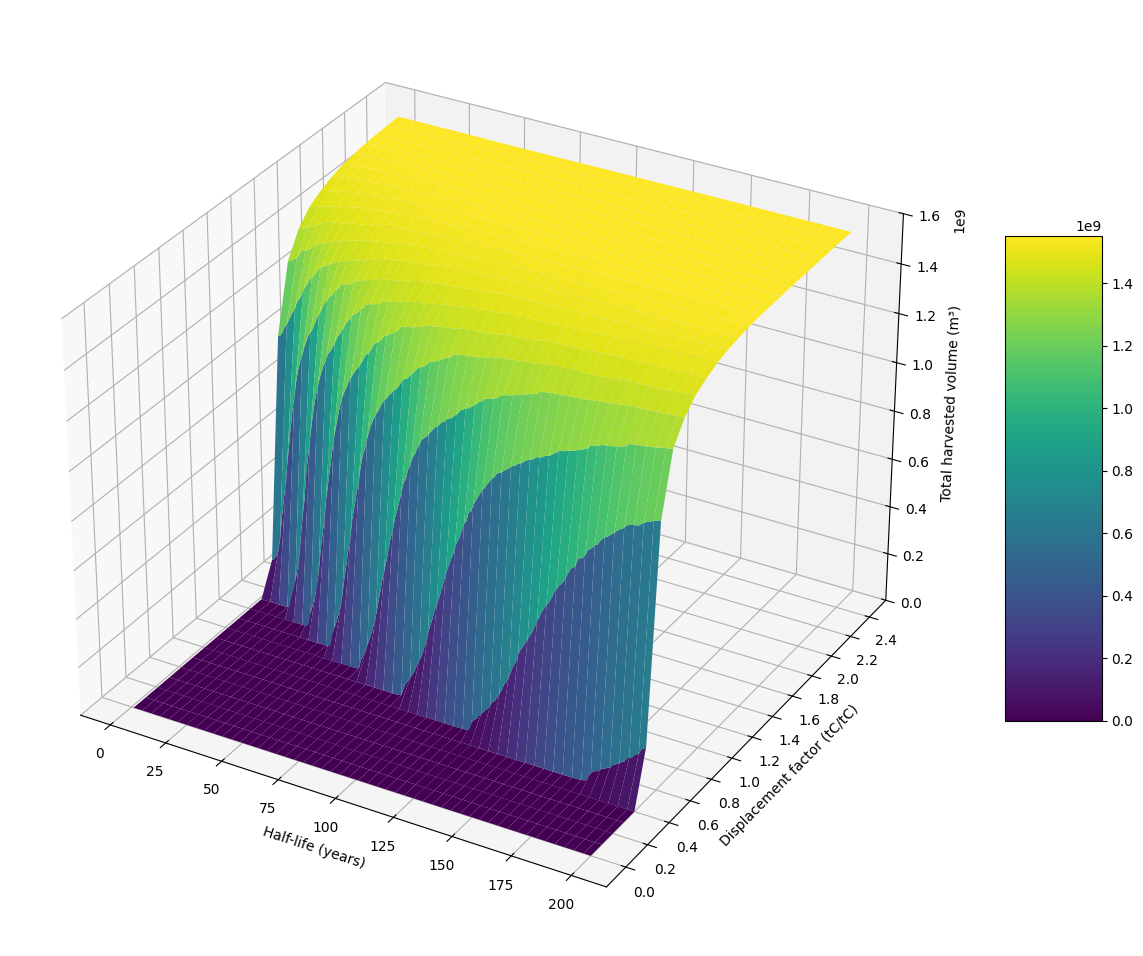

In [8]:
# Define the original range of displacement factors and half-lives
displacement_factors_both = [round(i * 0.1, 1) for i in range(25)]  # 0.0 to 2.4 with 0.1 steps (original data)
half_lives_both = range(1, iteration_both + 1) 

column_to_extract = 'ohv'

# Initialize a dictionary to store summed values for each displacement factor
extracted_values = {df: [] for df in displacement_factors_both}

# Extract and sum the specified column values across all periods for each combination of displacement factor and half-life
for df in displacement_factors_both:
    folder_path = os.path.join(base_folder_both, f"df_{df}")
    
    for hl in half_lives_both:
        csv_file = os.path.join(folder_path, "harvest", f"{hl}.csv")
        if os.path.exists(csv_file):
            df_data = pd.read_csv(csv_file)
            # Sum the specified column values across all periods
            period_sum = df_data[column_to_extract].sum()
            extracted_values[df].append(period_sum)

# Prepare data for 3D plotting
X, Y = np.meshgrid(half_lives_both, displacement_factors_both)  # Create a grid of half-lives and displacement factors
Z = np.array([extracted_values[df] for df in displacement_factors_both])  # Summed harvested volume as Z

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Set Z-axis ranges  
ax.set_zlim(0, 1.6e9)  
ax.set_zticks(np.arange(0, 1.61e9, 0.2e9))  

# Add labels and title
ax.set_xlabel('Half-life (years)')
ax.set_ylabel('Displacement factor (tC/tC)')
ax.set_zlabel('Total harvested volume (m³)')

# Set displacement factor ticks, without altering the data points (from 0.0 to 2.4 with 0.2 increments)
ax.set_yticks(np.arange(0, 2.5, 0.2))

# # Add color bar for better visualization of values
fig.colorbar(surf, shrink=0.5, aspect=5)

# Rotate the plot manually (optional)
ax.view_init(elev=30, azim=-60)  # Default 3D plot view

#Save to PDF files
plt.savefig('figures/3d_sensitivity.pdf', format='pdf', bbox_inches='tight')

plt.savefig(
    'figures/3d.jpg',
    format='jpg',
    dpi=600,
    bbox_inches='tight'
)

# Show plot
plt.tight_layout()
plt.show()

Create Orthographic-view Graphs for the 3D Map

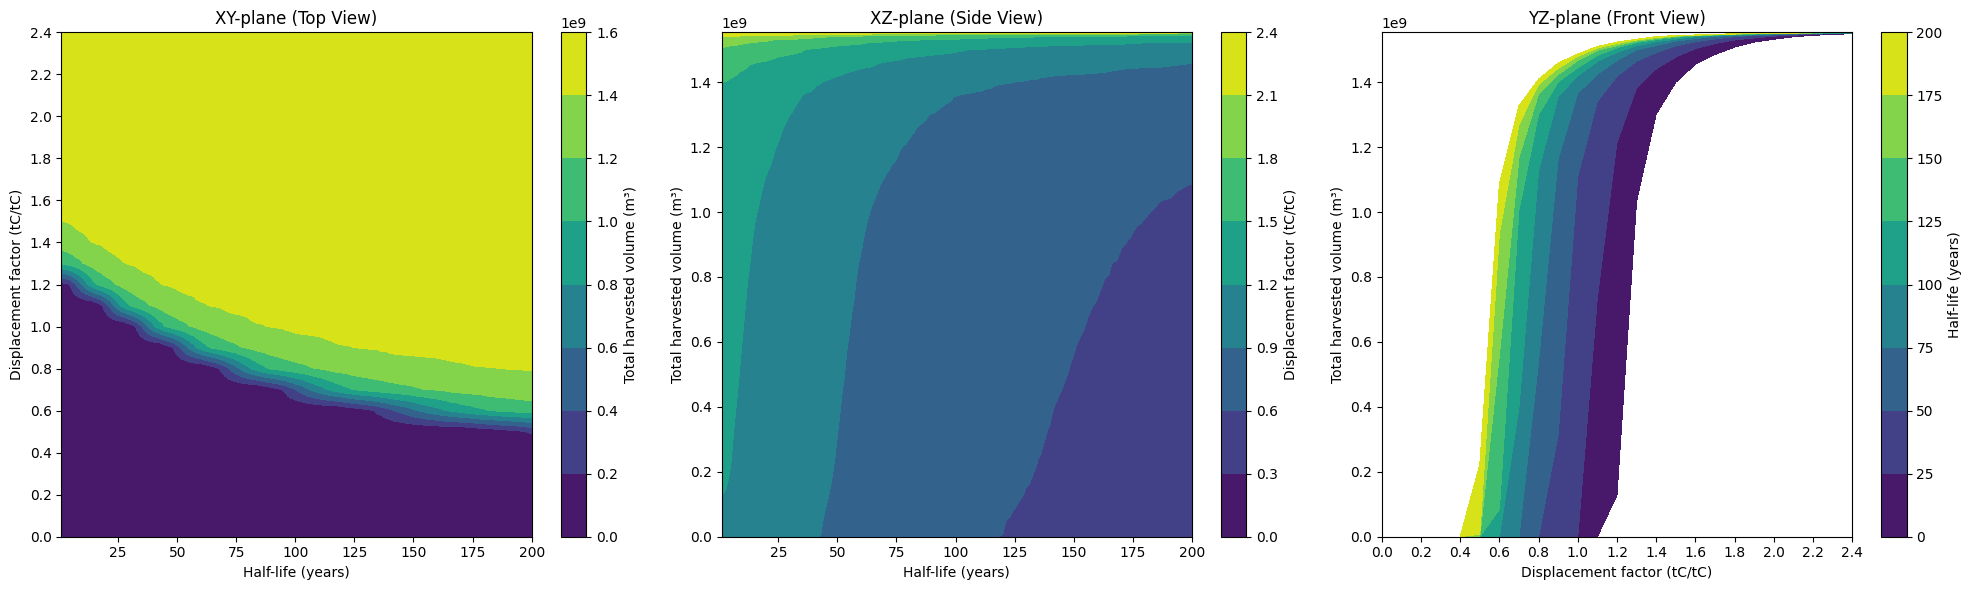

In [7]:
# Create 2D projections with color bars
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# XY-plane (Top View)
xy_contour = axes[0].contourf(X, Y, Z, cmap='viridis')
axes[0].set_title('XY-plane (Top View)')
axes[0].set_xlabel('Half-life (years)')
axes[0].set_ylabel('Displacement factor (tC/tC)')
axes[0].set_yticks(np.arange(0, 2.5, 0.2))  # Adjust ticks for displacement factor
cbar_xy = fig.colorbar(xy_contour, ax=axes[0])
cbar_xy.set_label('Total harvested volume (m³)')

# XZ-plane (Side View)
xz_contour = axes[1].contourf(X, Z, Y, cmap='viridis')
axes[1].set_title('XZ-plane (Side View)')
axes[1].set_xlabel('Half-life (years)')
axes[1].set_ylabel('Total harvested volume (m³)')
cbar_xz = fig.colorbar(xz_contour, ax=axes[1])
cbar_xz.set_label('Displacement factor (tC/tC)')

# YZ-plane (Front View)
yz_contour = axes[2].contourf(Y, Z, X, cmap='viridis')
axes[2].set_title('YZ-plane (Front View)')
axes[2].set_xlabel('Displacement factor (tC/tC)')
axes[2].set_ylabel('Total harvested volume (m³)')
axes[2].set_xticks(np.arange(0, 2.5, 0.2))  # Adjust ticks for displacement factor
cbar_yz = fig.colorbar(yz_contour, ax=axes[2])
cbar_yz.set_label('Half-life (years)')

# Save to PDF files
plt.savefig('figures/xyz.pdf', format='pdf', bbox_inches='tight')

plt.savefig(
    'figures/xyz.jpg',
    format='jpg',
    dpi=600,
    bbox_inches='tight'
)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()